<a href="https://colab.research.google.com/github/A-Serna1/github-slideshow/blob/main/ANN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP task 2

The second task of the project is a preparation for a futher overall application.  By preparation we mean that this is the initail step in bulding the 'brain' of the analysis framework.  The natural language processing environment tends to gravitate towards 'big' preprocessed networks that have words already wieghted by Google or Facebook (quote quoet####) but these word weigthings, and more importantly their meaning, will not necessairly transfer between domains.  For example a word like 'potential' could be interpreted as a positive one.  But anybody that has tried to buy a property and has browsed thorugh the Australian property websites knows that the meaning of the word 'potential' when applied to the domain of the property investors has other connotations, like 'not finished', 'needs work', etc. 
This was the initial thought that got us thinking on developing a 'brain' or a Neural Network, that is specifically trained to the domain of the Share Market.  This is the task of the second part of the NLP analyses in this work.  
The Network will have to be tagged or labelled for training.  In a general sense, we are trying to train our brain to know what is good and what is bad.  We are starting with a very simeple idea.  If the market went up we are tagging a 1 and if it didnt go up it is a 0.  Each news comments is associated with a particular ticker, and the Neural Net will be train based on whether that ticker went up or down.

The limitations for this work as it stands is that we need more data for the Network to be more reliable.  We need more words in the vocabulary, and we need more days of crawling to train the brain.  The final goal, as stated before, is to have a vocabulary that is used for the domain of the share market, so that other possibilities are tested, like prediciton (but we are not there yet)

#### a. Brief literature review of the NLP task 
Sentiment Analysis
Analyzing sentiment The sentiment in a sentence or text reflects the overall positive, negative, or neutral opinion or thought of the person who produces or consumes it. It indicates whether a person is happy, unhappy, or neutral about the subject or context that

#### b. Rational for selection of the NLP task 

The Sentiment Analysis NLP was chosen because the main aim of the work is to provide to end users a ‘grasp’ of the way that the market is feeling or saying.  This aligns v




What Is a Word Embedding?
Text is considered a form of sequence data similar to time series data that you would have in weather data or financial data. In the previous BOW model, you have seen how to represent a whole sequence of words as a single feature vector. Now you will see how to represent each word as vectors. There are various ways to vectorize text, such as:

Words represented by each word as a vector
Characters represented by each character as a vector
N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text)
In this tutorial, you’ll see how to deal with representing words as vectors which is the common way to use text in neural networks. Two possible ways to represent a word as a vector are one-hot encoding and word embeddings.

Word Embeddings
This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions.

Note that the word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space.

This would map semantically similar words close on the embedding space like numbers or colors. If the embedding captures the relationship between words well, things like vector arithmetic should become possible. A famous example in this field of study is the ability to map King - Man + Woman = Queen.

How can you get such a word embedding? You have two options for this. One way is to train your word embeddings during the training of your neural network. The other way is by using pretrained word embeddings which you can directly use in your model. There you have the option to either leave these word embeddings unchanged during training or you train them also.

Now you need to tokenize the data into a format that can be used by the word embeddings. Keras offers a couple of convenience methods for text preprocessing and sequence preprocessing which you can employ to prepare your text.

You can start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter num_words, which is responsible for setting the size of the vocabulary. The most common num_words words will be then kept. I have the testing and training data prepared from the previous example:

In [39]:
import io
import os
import re
import shutil
import string
from numpy import array
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization

In [95]:
# read the data from the crawler
# add three days of news
import pandas as pd
df1 = pd.read_csv('SP500_yahoo_news_30Nov.csv')
df2 = pd.read_csv('SP500_yahoo_news_01Dec.csv')
df3 = pd.read_csv('SP500_yahoo_news_02Dec.csv')
df4 = pd.read_csv('SP500_yahoo_news_03Dec.csv')
yhoo = pd.DataFrame()
yhoo = yhoo.append([df4])
#yhoo = pd.concat([df2,df4])

In [78]:
yhoo.head()

,Unnamed: 0,news,symbol,time,move
0,0,"The AES Corporation (AES), (Bloomberg) -- Alto...",AES,5.560230,1
1,1,"Alliant Energy Corporation (LNT), Reasons to A...",LNT,4.742781,1
2,2,"Ameren Corporation (AEE), A Note On Ameren Cor...",AEE,4.720568,1
3,3,"American Electric Power Company, Inc. (AEP), A...",AEP,4.796319,1
4,4,"American Water Works Company, Inc. (AWK), Why ...",AWK,5.361241,1


In [36]:
#############################
### libraries
import re 
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer    
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### c. Data pre-processing of inputs and outputs, separate from the WebCrawler harvesting
After the web crawler finished its job, we still had some pre-processing to do. The crawler had an initial elimination of non-ASCII characters that were sometimes found in the body of the website. After that was done then all the news comments were appended into a single dataframe. It was then pre-processed by removing stop words, removing punctuation and going to lower case. These tasks are aimed at reducing the number of words that are in the corpus, so that more meaningful words are found. The last pre-processing was stemming. Quote###########

#### Tokenization
Word tokens are the basic units of text involved in any NLP task. The first step, when processing text, is to split it into tokens. NLTK provides different types of tokenizers for doing this. Arumugam, Rajesh, and Rajalingappaa Shanmugamani. Hands-On Natural Language Processing with Python : A Practical Guide to Applying Deep Learning Architectures to Your NLP Applications, Packt Publishing, Limited, 2018. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/jcu/detail.action?docID=5456142. Created from jcu on 2021-11-29 10:55:35.

#### Stemming
Stemming is a text preprocessing task for transforming related or similar variants of a word (such as walking) to its base form (to walk). One of the basic transformation stemming actions is to reduce a plural word to its singular form: apples is reduced to apple , for example. Arumugam, Rajesh, and Rajalingappaa Shanmugamani. Hands-On Natural Language Processing with Python : A Practical Guide to Applying Deep Learning Architectures to Your NLP Applications, Packt Publishing, Limited, 2018. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/jcu/detail.action?docID=5456142. Created from jcu on 2021-11-29 10:56:12.

#### Removing stop words
Commonly used words in English such as the , is , he , and so on, are generally called stop words. Other languages have similar commonly used words that fall under the same category. Stop word removal is another common preprocessing step for an NLP application. In this step, we remove words that do not signify any importance to the document, such as grammar articles and pronouns. Some examples of such words are a , an , he , and her. By themselves, these words may not have an impact on NLP tasks, such as text categorization or search, as they are frequently used throughout the text.

Arumugam, Rajesh, and Rajalingappaa Shanmugamani. Hands-On Natural Language Processing with Python : A Practical Guide to Applying Deep Learning Architectures to Your NLP Applications, Packt Publishing, Limited, 2018. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/jcu/detail.action?docID=5456142. Created from jcu on 2021-11-29 10:56:43.

d. Specification and justification of any hyperparameters

In [96]:
######################
## pre process
def text_preprocessing(uncleaned_text_corpus):
    corpus = []
    for i in range(0, len(uncleaned_text_corpus)):
      try:
        review = re.sub('[^a-zA-Z]', ' ',uncleaned_text_corpus[i])
        review = review.lower()
        #review = remove_urls(review)
        review = review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.extend(['fool', 'yahoo', 'motley', 'zacks', 'bloomberg', 'day ago', 'hour ago',
                            'pr','simply', 'newswire', 'wire', 'st', 'wall','n','u',
                            'ago', 'hours', 'days', 'company', 'q','business','stock', 'market',
                            'video', 'q3', 'transcript', 'inc', 'call', 'nyse', 'g'])
        all_stopwords.remove('not')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        #review = [word for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
      except:
        raise
    return corpus
            
cleaned_corpus = text_preprocessing(yhoo['news'])
yhoo['newsc'] = cleaned_corpus

Word Embeddings
This method represents words as dense word vectors (also called word embeddings) which are trained unlike the one-hot encoding which are hardcoded. This means that the word embeddings collect more information into fewer dimensions.

Note that the word embeddings do not understand the text as a human would, but they rather map the statistical structure of the language used in the corpus. Their aim is to map semantic meaning into a geometric space. This geometric space is then called the embedding space.

This would map semantically similar words close on the embedding space like numbers or colors. If the embedding captures the relationship between words well, things like vector arithmetic should become possible. A famous example in this field of study is the ability to map King - Man + Woman = Queen.

How can you get such a word embedding? You have two options for this. One way is to train your word embeddings during the training of your neural network. The other way is by using pretrained word embeddings which you can directly use in your model. There you have the option to either leave these word embeddings unchanged during training or you train them also.

Now you need to tokenize the data into a format that can be used by the word embeddings. Keras offers a couple of convenience methods for text preprocessing and sequence preprocessing which you can employ to prepare your text.

You can start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter num_words, which is responsible for setting the size of the vocabulary. The most common num_words words will be then kept. I have the testing and training data prepared from the previous example:

In [ ]:
# Create a custom standardization function to strip HTML break tags '<br />'.
#def custom_standardization(input_data):
#  lowercase = tf.strings.lower(input_data)
#  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
#  return tf.strings.regex_replace(stripped_html,
#                                  '[%s]' % re.escape(string.punctuation), '')

In [54]:
import numpy as np
# define document corpus
docs = yhoo.newsc.tolist()

# define labels
labels = np.array(yhoo.move)

# integer encode the documents
vocab_size = 300

# one hot encoding
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)


[[93, 83, 93, 166, 171, 11, 67, 255, 236, 143, 194, 174, 33, 88, 59, 25, 239, 54, 205, 10, 7, 91, 229, 5, 113, 124, 2, 87, 265, 175, 113, 22, 258, 193, 141, 5, 215, 117, 272, 268, 224, 112, 140, 117, 52, 7, 93, 143, 86, 269, 47, 180, 208, 93, 83, 93, 251, 93, 179, 251, 78, 200, 183, 93, 4, 200, 286, 58, 133, 183, 96, 96, 185, 23, 78, 93, 93, 179, 251, 200, 78, 93, 93, 40, 251, 200, 42, 219, 133, 179, 60, 40, 206, 46, 72, 11, 20, 93, 93, 85, 96, 93, 83, 93, 232, 251, 270, 93, 83, 93, 273, 233, 113, 200, 118, 137, 293, 108, 200, 196, 93, 233], [234, 284, 83, 217, 240, 89, 234, 284, 217, 76, 234, 284, 217, 164, 13, 289, 20, 207, 78, 284, 13, 251, 42, 296, 277, 20, 257, 132, 258, 82, 177, 234, 284, 217, 194, 35, 99, 29, 203, 234, 284, 217, 203, 155, 47, 249, 99, 286, 209, 291, 95, 143, 115, 29, 121, 20, 23, 287], [150, 83, 209, 103, 150, 83, 209, 202, 29, 75, 150, 143, 209, 251, 209, 251, 123, 179, 60, 150, 209, 46, 251, 78, 161, 157, 113, 150, 209, 200, 286, 183, 96, 96, 185, 23, 78, 150,

In [ ]:
labels

In [55]:
# pad documents to a max length of 500 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 93  83  93 ...   0   0   0]
 [234 284  83 ...   0   0   0]
 [150  83 209 ...   0   0   0]
 ...
 [ 67 120 164 ...   0   0   0]
 [172 165   0 ...   0   0   0]
 [ 68 226  34 ...   0   0   0]]


In [56]:
# Vocabulary size and number of words in a sequence.
sequence_length = 500

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize='lower_and_strip_punctuation',
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = docs 
vectorize_layer.adapt(text_ds)
print(vectorize_layer.get_vocabulary())

['', '[UNK]', 'earn', 'estim', 'revenu', 'report', 'quarter', 'like', 'nasdaq', 'year', 'end', 'beat', 'corpor', 'expect', 'key', 'hold', 'growth', 'septemb', 'clue', 'result', 'share', 'dividend', 'ahead', 'look', 'valu', 'surpris', 'third', 'deliv', 'investor', 'buy', 'respect', 'number', 'energi', 'reflect', 'financi', 'technolog', 'next', 'right', 'lie', 'two', 'top', 'last', 'price', 'gain', 'take', 'prepar', 'group', 'strong', 'stock', 'get', 'combin', 'perform', 'higher', 'upcom', 'better', 'period', 'possess', 'solid', 'invest', 'demand', 'ingredi', 'trade', 'benefit', 'sale', 'product', 'sharehold', 'new', 'week', 'cost', 'well', 'servic', 'know', 'industri', 'move', 'increas', 'high', 'compani', 'grow', 'continu', 'fiscal', 'intern', 'sinc', 'see', 'line', 'could', 'segment', 'vs', 'recent', 'improv', 'posit', 'surpass', 'rise', 'one', 'might', 'return', 'option', 'corp', 'day', 'five', 'close', 'today', 'season', 'portfolio', 'view', 'store', 'solut', 'global', 'capit', 'uni

In [57]:
# define the model
#model = Sequential()
#model.add(Embedding(vocab_size, 500, name="embedding", input_length=max_length))
#model.add(vectorize_layer)
#model.add(Flatten())
#model.add(Dense(1, activation='sigmoid'))

This is typically a not very reliable way to work with sequential data as you can see in the performance. When working with sequential data you want to focus on methods that look at local and sequential information instead of absolute positional information.

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. You can think of the pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors.

In the case of max pooling you take the maximum value of all features in the pool for each feature dimension. In the case of average pooling you take the average, but max pooling seems to be more commonly used as it highlights large values.

Global max/average pooling takes the maximum/average of all features whereas in the other case you have to define the pool size. Keras has again its own layer that you can add in the sequential model:

In [58]:
from keras import layers

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=500, 
                           input_length=max_length))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 500)          150000    
                                                                 
 global_max_pooling1d (Globa  (None, 500)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 155,021
Trainable params: 155,021
Non-trainable params: 0
_________________________________________________________________


In [59]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
# summarize the model
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 500)          150000    
                                                                 
 global_max_pooling1d (Globa  (None, 500)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 155,021
Trainable params: 155,021
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model
#model.fit(padded_docs, labels, epochs=70, verbose=1)

In [61]:
# https://realpython.com/python-keras-text-classification/
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.40, random_state=1000)

In [62]:
history = model.fit(X_train, y_train,
                     epochs=70,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

In [63]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9426


In [64]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

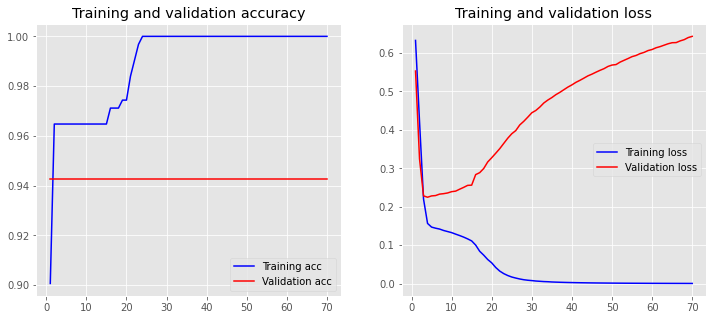

In [65]:
plot_history(history)
#history.history

#You can see that we have trained our model for too long since the training set reached 100% accuracy. 
#A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. 
#This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.

In [66]:
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 97.696739


In [67]:
# this is the output from the embedded layer 
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [68]:
print(vectorize_layer.get_vocabulary())

['', '[UNK]', 'earn', 'estim', 'revenu', 'report', 'quarter', 'like', 'nasdaq', 'year', 'end', 'beat', 'corpor', 'expect', 'key', 'hold', 'growth', 'septemb', 'clue', 'result', 'share', 'dividend', 'ahead', 'look', 'valu', 'surpris', 'third', 'deliv', 'investor', 'buy', 'respect', 'number', 'energi', 'reflect', 'financi', 'technolog', 'next', 'right', 'lie', 'two', 'top', 'last', 'price', 'gain', 'take', 'prepar', 'group', 'strong', 'stock', 'get', 'combin', 'perform', 'higher', 'upcom', 'better', 'period', 'possess', 'solid', 'invest', 'demand', 'ingredi', 'trade', 'benefit', 'sale', 'product', 'sharehold', 'new', 'week', 'cost', 'well', 'servic', 'know', 'industri', 'move', 'increas', 'high', 'compani', 'grow', 'continu', 'fiscal', 'intern', 'sinc', 'see', 'line', 'could', 'segment', 'vs', 'recent', 'improv', 'posit', 'surpass', 'rise', 'one', 'might', 'return', 'option', 'corp', 'day', 'five', 'close', 'today', 'season', 'portfolio', 'view', 'store', 'solut', 'global', 'capit', 'uni

In [ ]:
#out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
#out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  print(word)
  print(vec)

  #out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  #out_m.write(word + "\n")
#out_v.close()
#out_m.close()

In [62]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# predict with data from the matrix, needs to be padded
#len(X_train[0])
model.predict(padded_docs[[282]], batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
#X_train[[0]

array([[0.99883413]], dtype=float32)

In [70]:
df.iloc[282,:]
#X_train[[157]]

Unnamed: 0                                                  282
news          Quest Diagnostics Incorporated (DGX), Quest Di...
symbol                                                      DGX
time                                                    7.21327
move                                                          1
newsc         quest diagnost incorpor dgx quest diagnost dgx...
Name: 282, dtype: object

In [71]:
vocab[50:60]
#docs[0]
words = [enumerate(d) for d in docs]

In [72]:
docs[6]

'centerpoint energi cnp could centerpoint energi cnp ownership structur tell us someth use look sharehold centerpoint energi cnp tell us group power larg centerpoint energi cnp earn imag sourc centerpoint energi cnp earn callnov etcont prepar remark question answer particip prepar remark operatorgood morn welcom centerpoint energi third quarter earn confer senior manag centerpoint energi cnp beat earn up ep view centerpoint energi cnp revenu million exceed consensu estim increas year year'

In [227]:
from numpy import argmax
# to convert back to text
#text = tokenizer.sequences_to_texts(<list-of-integer-equivalent-encodings>)

# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(words))
int_to_char = dict((i, c) for i, c in enumerate(words))

#inverted = int_to_char[argmax(encoded_docs[0])]
#inverted = label_encoder.inverse_transform([argmax(encoded[0, :])])
#print(inverted)
type(encoded_docs)

# https://colab.research.google.com/github/alzayats/Google_Colab/blob/master/6_1_one_hot_encoding_of_words_or_characters.ipynb

list

In [251]:
# loop
ddd=[]
for d in docs:
  dd = one_hot(d, vocab_size)
  ddd.append(dd)

ww=[]
# loop for words
for d in docs:
  w = d.split(' ')
  ww.append(w)
#encoded_docs = [one_hot(d, vocab_size) for d in docs]

In [271]:
# getting there
ddd = pd.DataFrame(ddd)
ww = pd.DataFrame(ww)

ddd[ww[ww == 'The'].loc]

KeyError: ignored